<a href="https://colab.research.google.com/github/Self-nasu/YOLO-objdetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Code Clause Task 2 - Object Detection using pre trained YOLO Model**

In [1]:
!pip install opencv-python-headless

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

--2024-07-31 03:51:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  24.5MB/s    in 10s     

2024-07-31 03:51:43 (23.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-07-31 03:51:43--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class names
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")


In [40]:
# List of image paths
image_paths = ["mytest1.jpg", "mytest2.jpg", "mytest3.png"]

In [45]:
# Function to process and annotate images
def detect_objects(img_path):
    img = cv2.imread(img_path)
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    layer_names = net.getLayerNames()
    output_layers_indices = net.getUnconnectedOutLayers()
    if not isinstance(output_layers_indices, np.ndarray):
        output_layers_indices = np.array([output_layers_indices])
    output_layers = [layer_names[i - 1] for i in output_layers_indices]

    detections = net.forward(output_layers)

    height, width = img.shape[:2]
    boxes = []
    confidences = []
    class_ids = []

    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = int(np.argmax(scores))
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (155, 0, 235)  # color for bounding box
            black_color = (0, 0, 0)  # Black color
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 7)
            cv2.putText(img, f"{label} {confidence:.2f}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, black_color, 5)

    return img

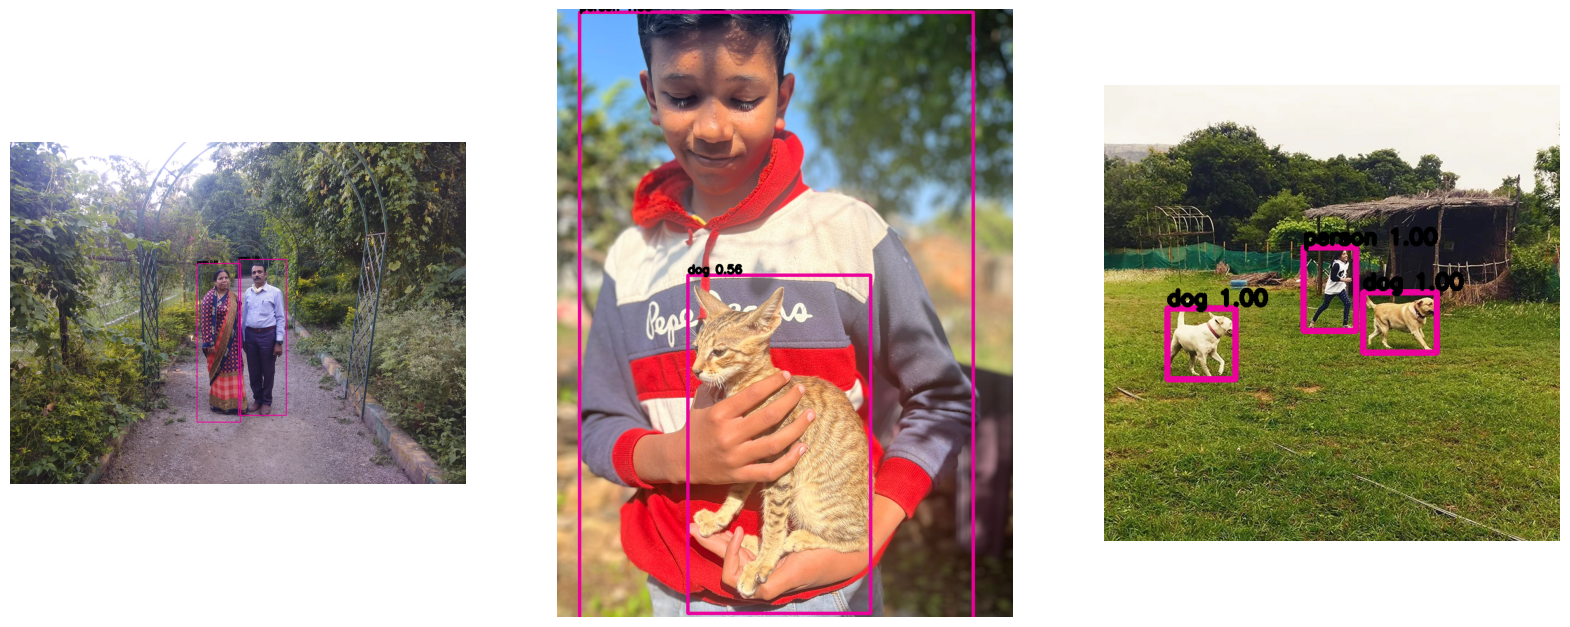

In [46]:
# Process and display each image
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, img_path in enumerate(image_paths):
    annotated_img = detect_objects(img_path)
    axes[i].imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')

plt.show()